In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
from itertools import chain
import numpy as np

In [2]:
def get_data(exp_path):
    chromos = []
    with open(exp_path, "r") as f:
        results = json.load(f)
        for fitness, chromo in zip(results["pop_vals"], results["chromos"]):
            c = list(chain.from_iterable(chromo[1]))
            c.append(fitness[1])
            chromos.append(c)
    columns = list(chain.from_iterable([[f"aug{i}", f"op{i}"] for i in range(1, 4)]))
    columns.append("test acc")
    columns
    df = pd.DataFrame(chromos, columns=columns)
    
    # create data in long format
    ops = set(list(df["aug1"]) + list(df["aug2"]) +  list(df["aug3"]))
    indexes = {op:i for i, op in enumerate(ops)}
    chromos_long = np.zeros([len(chromos), len(ops)+1])
    for i, c in enumerate(chromos):
        for aug, intensity in zip(c[:-2][::2], c[:-2][1::2]):
            chromos_long[i][indexes[aug]] = intensity
            chromos_long[i][-1] = c[-1]
    columns_long = list(ops) + ["fitness"]
    df_long = pd.DataFrame(chromos_long, columns = columns_long)
    return df, df_long, ops

In [3]:
# EXP OPT #

b256 = [
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp8_0/previous/runexp8-0/6/outcomes.json",
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp8_1/runexp8-1/4/outcomes.json",
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp8_2/runexp8-2/5/outcomes.json",
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp8_3/0/outcomes.json"
]

b256_names = ["SwaV", "BYOL", "SimSiam", "NNCLR"]

b32 = [
    "/home/noah/ESSL/exps/iteration4/exp6_1/6/outcomes.json",
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp6_2/runexp6-2/8/outcomes.json",
    # "/home/noah/ESSL/exps/iteration4/exp6_3_0/3/outcomes.json",
    "/home/noah/ESSL/exps/iteration4/exp6_0/3/outcomes.json"
]

b32_names = ["SwaV", "BYOL", "SimSiam", "NNCLR"]

In [4]:
# for exp_path, exp_name in zip(b256, b256_names):
#     df, df_long, ops = get_data(exp_path)
#     sns.pairplot(df_long)
#     plt.suptitle(exp_name)
#     plt.show()
#     plt.clf()

It is difficult to draw much conclusions from the pairplots

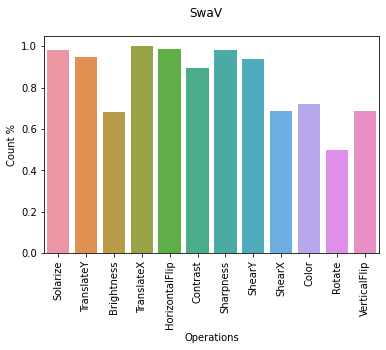

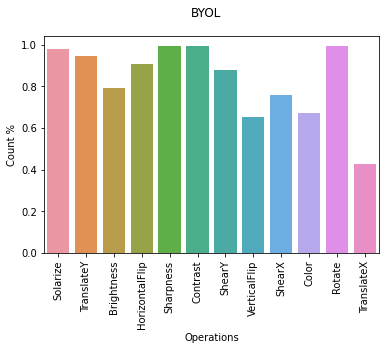

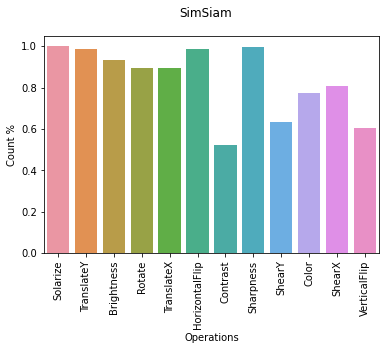

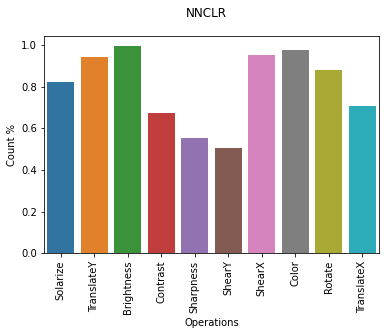

<Figure size 432x288 with 0 Axes>

In [5]:
# looking at sparsity of each feature in each exp
for exp_path, exp_name in zip(b256, b256_names):
    df, df_long, ops = get_data(exp_path)
    counts = []
    for op in ops:
        counts.append([op, (df_long[op] == 0).sum()/len(df_long[op])])
    sparsity_df = pd.DataFrame(counts, columns = ["Operations", "Count %"])
    sns.barplot(data=sparsity_df, x="Operations", y="Count %")
    plt.suptitle(exp_name)
    plt.xticks(rotation=90)
    plt.show()
    plt.clf()
    

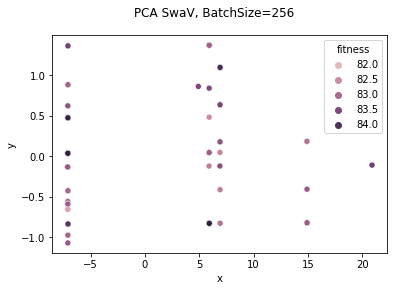

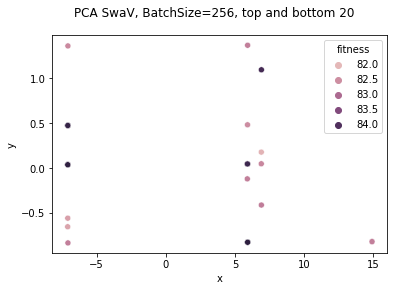

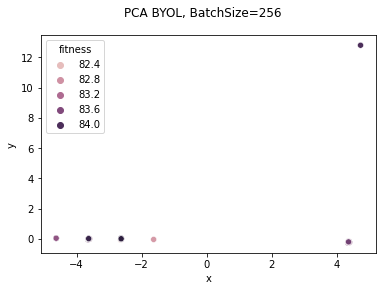

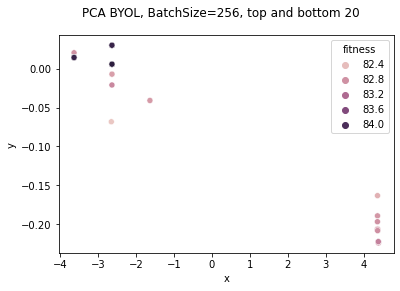

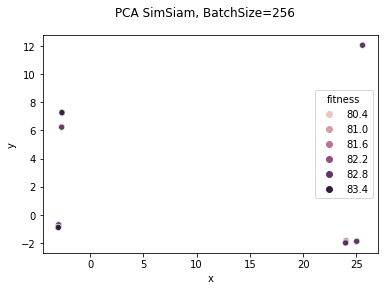

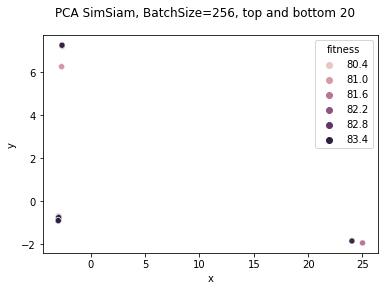

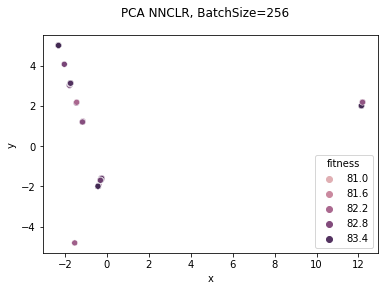

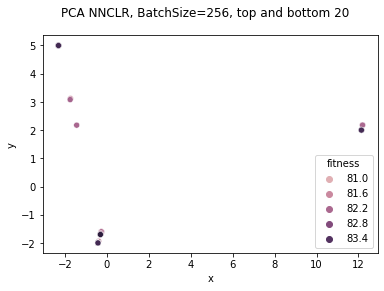

<Figure size 432x288 with 0 Axes>

In [6]:
from sklearn.decomposition import PCA
for exp_path, exp_name in zip(b256, b256_names):
    df, df_long, ops = get_data(exp_path)
    pca = PCA(n_components=2)
    pc = pca.fit_transform(df_long.loc[:, df_long.columns != "fitness"])
    PC = pd.DataFrame(pc, columns=["x", "y"])
    PC["fitness"] = df_long["fitness"]
    sns.scatterplot(data=PC, x="x", y="y", hue="fitness")
    plt.suptitle(f"PCA {exp_name}, BatchSize=256")
    plt.show()
    plt.clf()
    
    PC_reduced = PC.sort_values(by="fitness")
    PC_reduced = PC_reduced.head(20).append(PC_reduced.tail(20))
    sns.scatterplot(data=PC_reduced, x="x", y="y", hue="fitness")
    plt.suptitle(f"PCA {exp_name}, BatchSize=256, top and bottom 20")
    plt.show()
    plt.clf()

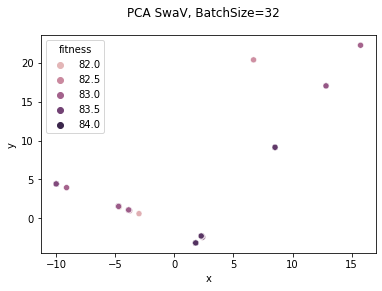

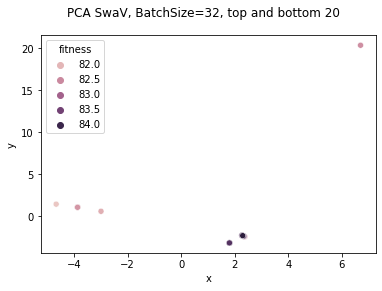

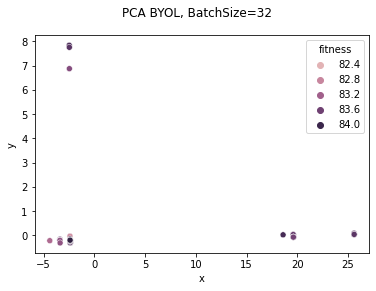

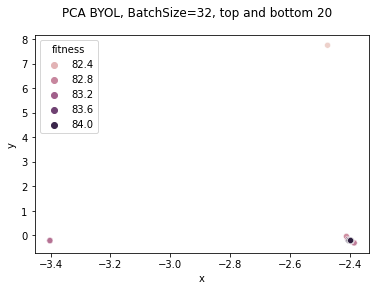

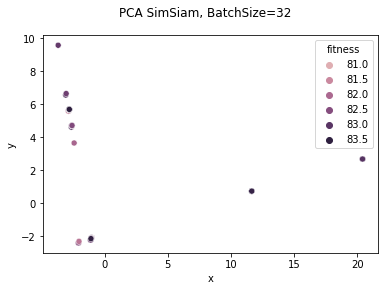

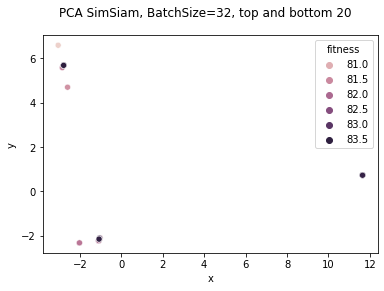

<Figure size 432x288 with 0 Axes>

In [7]:
for exp_path, exp_name in zip(b32, b32_names):
    df, df_long, ops = get_data(exp_path)
    pca = PCA(n_components=2)
    pc = pca.fit_transform(df_long.loc[:, df_long.columns != "fitness"])
    PC = pd.DataFrame(pc, columns=["x", "y"])
    PC["fitness"] = df_long["fitness"]
    sns.scatterplot(data=PC, x="x", y="y", hue="fitness")
    plt.suptitle(f"PCA {exp_name}, BatchSize=32")
    plt.show()
    plt.clf()
    
    PC_reduced = PC.sort_values(by="fitness")
    PC_reduced = PC_reduced.head(20).append(PC_reduced.tail(20))
    sns.scatterplot(data=PC_reduced, x="x", y="y", hue="fitness")
    plt.suptitle(f"PCA {exp_name}, BatchSize=32, top and bottom 20")
    plt.show()
    plt.clf()

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


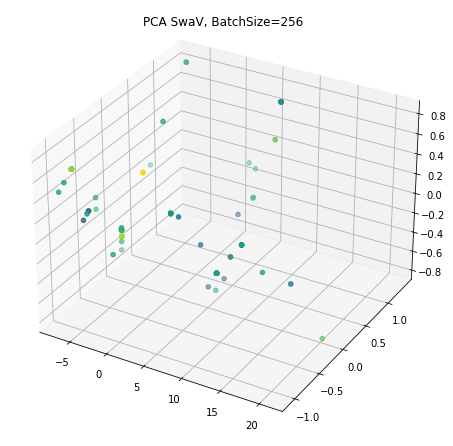

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


<Figure size 432x288 with 0 Axes>

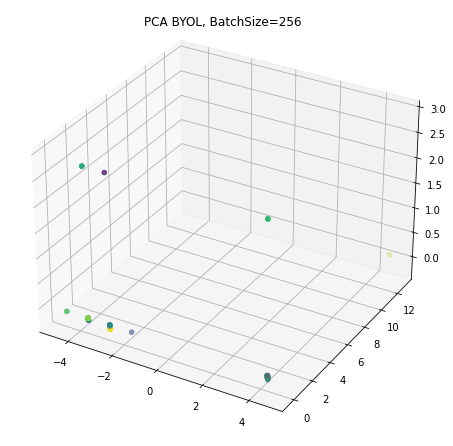

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


<Figure size 432x288 with 0 Axes>

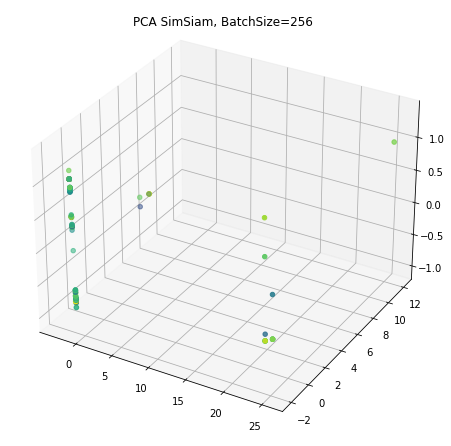

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


<Figure size 432x288 with 0 Axes>

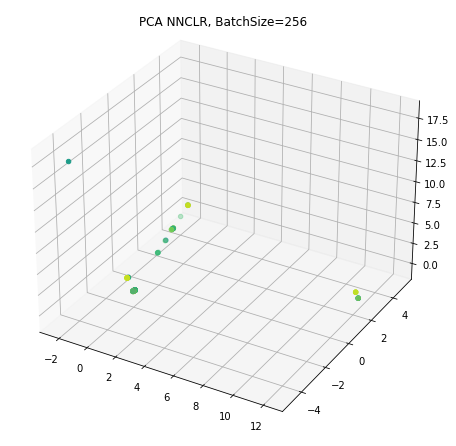

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
from mpl_toolkits.mplot3d import Axes3D
for exp_path, exp_name in zip(b256, b256_names):
    df, df_long, ops = get_data(exp_path)
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig) # Method 1
    pca = PCA(n_components=3)
    pc = pca.fit_transform(df_long.loc[:, df_long.columns != "fitness"])
    PC = pd.DataFrame(pc, columns=["x", "y", "z"])
    PC["fitness"] = df_long["fitness"]
    ax.scatter(PC["x"], PC["y"], PC["z"], c=PC["fitness"], marker='o')
    plt.suptitle(f"PCA {exp_name}, BatchSize=256")
    plt.show()
    plt.clf()
    
    ax = Axes3D(fig) # Method 1
    PC_reduced = PC.sort_values(by="fitness")
    PC_reduced = PC_reduced.head(20).append(PC_reduced.tail(20))
    ax.scatter(PC_reduced["x"], PC_reduced["y"], PC_reduced["z"], c=PC_reduced["fitness"], marker='o')
    plt.suptitle(f"PCA {exp_name}, BatchSize=256, top and bottom 20")
    plt.show()
    plt.clf()

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


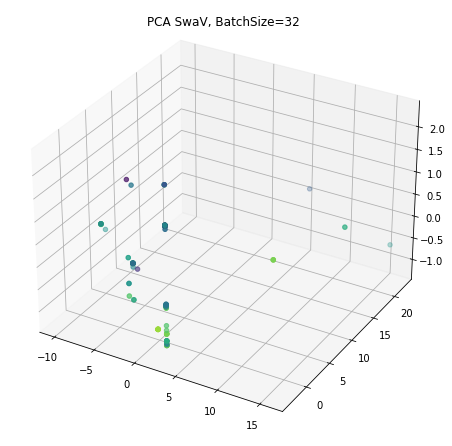

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


<Figure size 432x288 with 0 Axes>

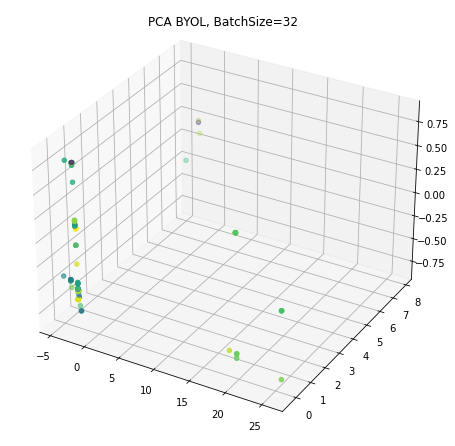

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


<Figure size 432x288 with 0 Axes>

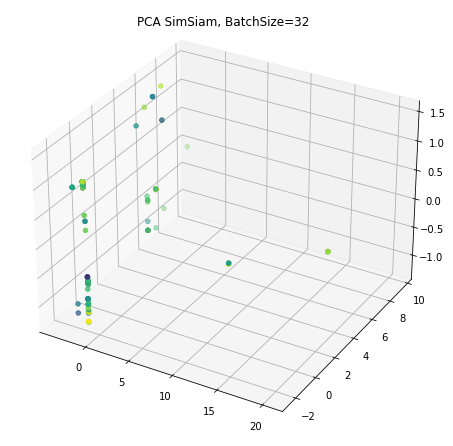

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:

for exp_path, exp_name in zip(b32, b32_names):
    df, df_long, ops = get_data(exp_path)
    fig = plt.figure(figsize=(6,6))
    
    ax = Axes3D(fig) # Method 1
    pca = PCA(n_components=3)
    pc = pca.fit_transform(df_long.loc[:, df_long.columns != "fitness"])
    PC = pd.DataFrame(pc, columns=["x", "y", "z"])
    PC["fitness"] = df_long["fitness"]
    ax.scatter(PC["x"], PC["y"], PC["z"], c=PC["fitness"], marker='o')
    plt.suptitle(f"PCA {exp_name}, BatchSize=32")
    plt.show()
    plt.clf()
    
    ax = Axes3D(fig) # Method 1
    PC_reduced = PC.sort_values(by="fitness")
    PC_reduced = PC_reduced.head(20).append(PC_reduced.tail(20))
    ax.scatter(PC_reduced["x"], PC_reduced["y"], PC_reduced["z"], c=PC_reduced["fitness"], marker='o')
    plt.suptitle(f"PCA {exp_name}, BatchSize=32, top and bottom 20")
    plt.show()
    plt.clf()

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


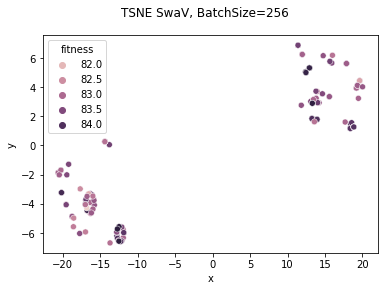

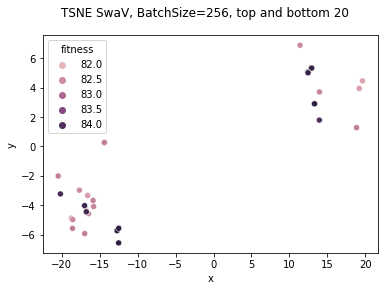

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


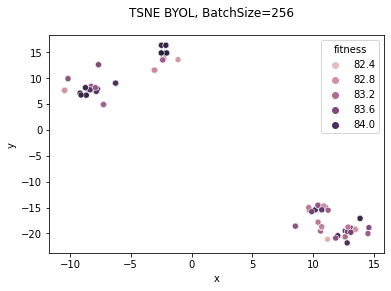

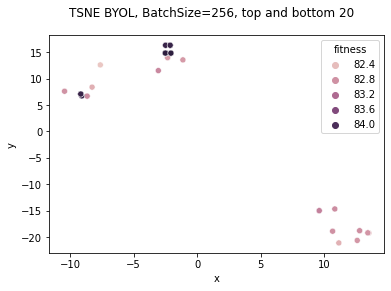

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


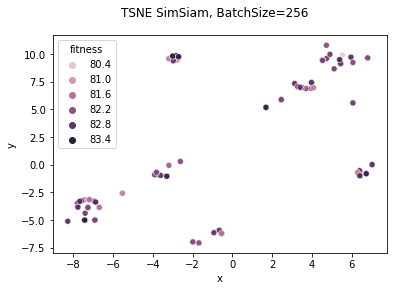

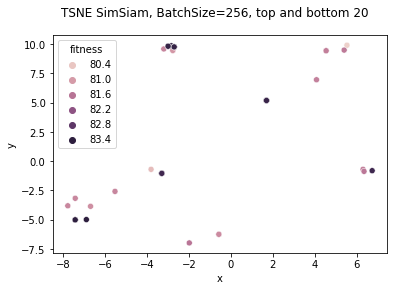

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


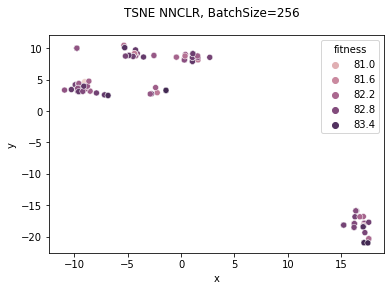

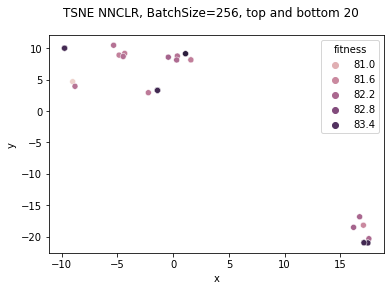

<Figure size 432x288 with 0 Axes>

In [10]:
from sklearn.manifold import TSNE
for exp_path, exp_name in zip(b256, b256_names):
    df, df_long, ops = get_data(exp_path)
    tsne = TSNE(n_components=2)
    pc = tsne.fit_transform(df_long.loc[:, df_long.columns != "fitness"])
    PC = pd.DataFrame(pc, columns=["x", "y"])
    PC["fitness"] = df_long["fitness"]
    sns.scatterplot(data=PC, x="x", y="y", hue="fitness")
    plt.suptitle(f"TSNE {exp_name}, BatchSize=256")
    plt.show()
    
    plt.clf()
    
    PC_reduced = PC.sort_values(by="fitness")
    PC_reduced = PC_reduced.head(20).append(PC_reduced.tail(20))
    sns.scatterplot(data=PC_reduced, x="x", y="y", hue="fitness")
    plt.suptitle(f"TSNE {exp_name}, BatchSize=256, top and bottom 20")
    plt.show()
    plt.clf()

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


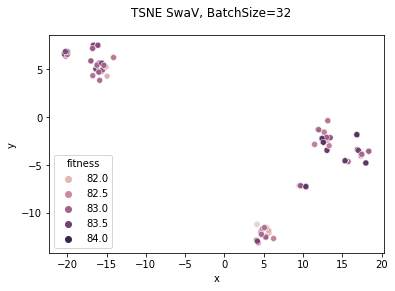

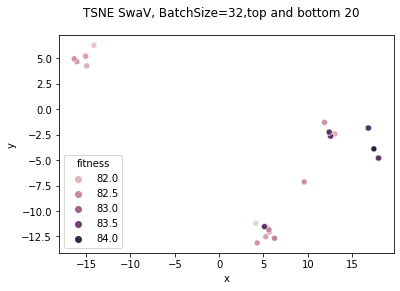

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


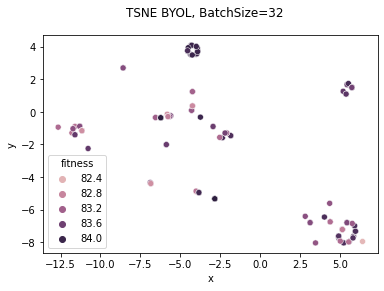

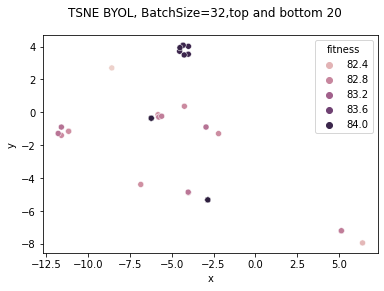

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


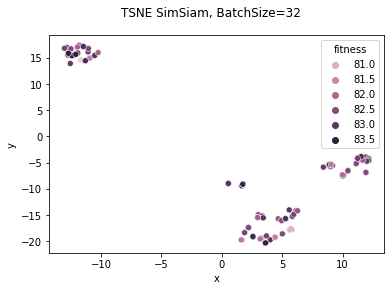

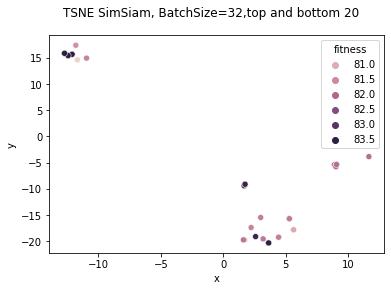

<Figure size 432x288 with 0 Axes>

In [11]:
for exp_path, exp_name in zip(b32, b32_names):
    df, df_long, ops = get_data(exp_path)
    tsne = TSNE(n_components=2)
    pc = tsne.fit_transform(df_long.loc[:, df_long.columns != "fitness"])
    PC = pd.DataFrame(pc, columns=["x", "y"])
    PC["fitness"] = df_long["fitness"]
    sns.scatterplot(data=PC, x="x", y="y", hue="fitness")
    plt.suptitle(f"TSNE {exp_name}, BatchSize=32")
    plt.show()
    
    plt.clf()
    
    PC_reduced = PC.sort_values(by="fitness")
    PC_reduced = PC_reduced.head(20).append(PC_reduced.tail(20))
    sns.scatterplot(data=PC_reduced, x="x", y="y", hue="fitness")
    plt.suptitle(f"TSNE {exp_name}, BatchSize=32,top and bottom 20")
    plt.show()
    plt.clf()

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


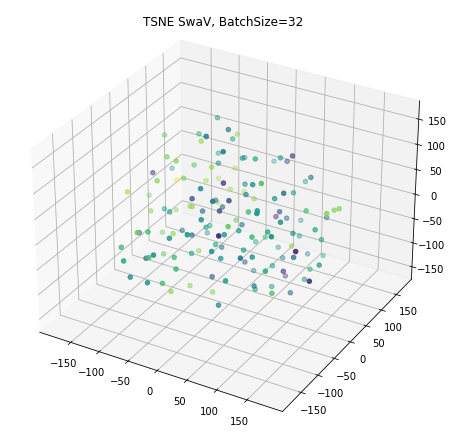

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<Figure size 432x288 with 0 Axes>

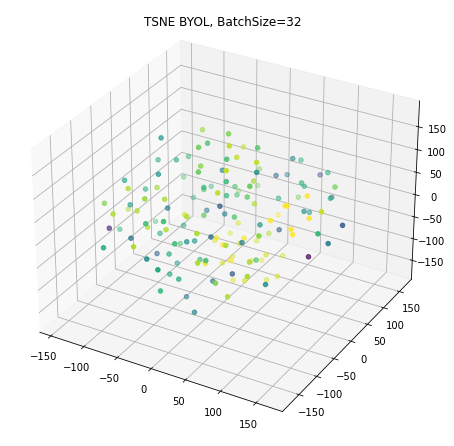

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<Figure size 432x288 with 0 Axes>

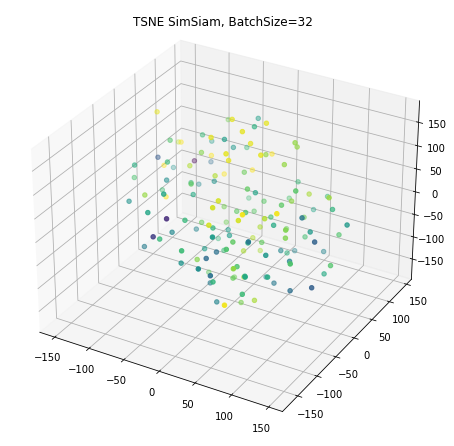

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:

for exp_path, exp_name in zip(b32, b32_names):
    df, df_long, ops = get_data(exp_path)
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig) # Method 1
    tsne = TSNE(n_components=3)
    pc = tsne.fit_transform(df_long.loc[:, df_long.columns != "fitness"])
    PC = pd.DataFrame(pc, columns=["x", "y", "z"])
    PC["fitness"] = df_long["fitness"]
    ax.scatter(PC["x"], PC["y"], PC["z"], c=df_long["fitness"], marker='o')
    plt.suptitle(f"TSNE {exp_name}, BatchSize=32")
    plt.show()
    plt.clf()
    
    ax = Axes3D(fig) # Method 1
    PC_reduced = PC.sort_values(by="fitness")
    PC_reduced = PC_reduced.head(20).append(PC_reduced.tail(20))
    ax.scatter(PC_reduced["x"], PC_reduced["y"], PC_reduced["z"], c=PC_reduced["fitness"], marker='o')
    plt.suptitle(f"TSNE {exp_name}, BatchSize=32, top and bottom 20")
    plt.show()
    plt.clf()

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


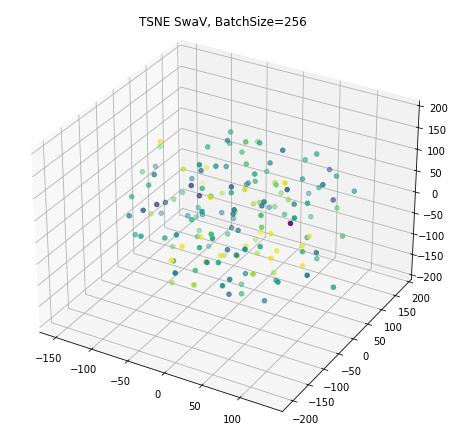

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<Figure size 432x288 with 0 Axes>

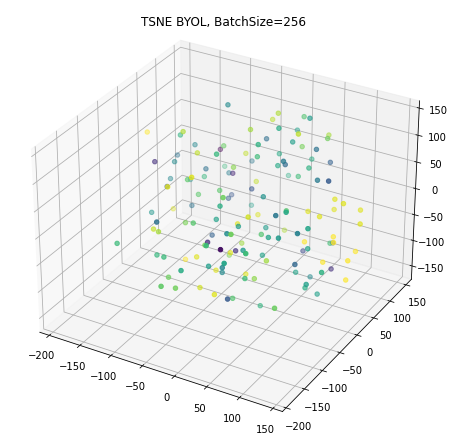

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<Figure size 432x288 with 0 Axes>

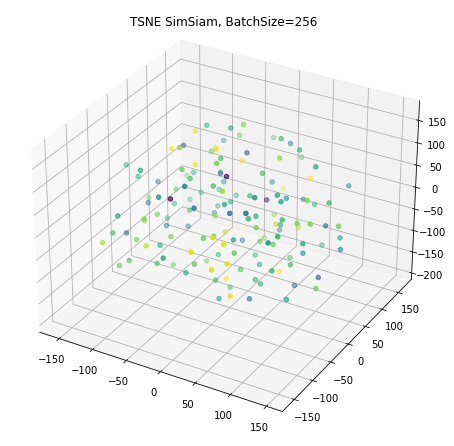

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<Figure size 432x288 with 0 Axes>

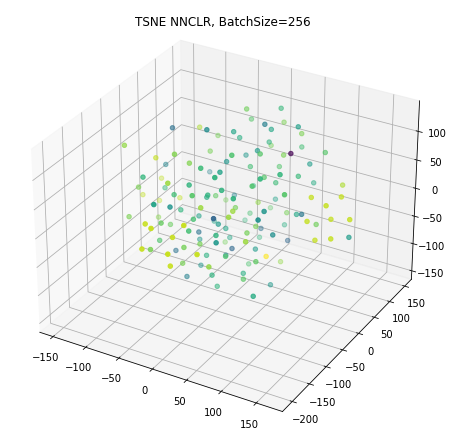

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
for exp_path, exp_name in zip(b256, b256_names):
    df, df_long, ops = get_data(exp_path)
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig) # Method 1
    tsne = TSNE(n_components=3)
    pc = tsne.fit_transform(df_long.loc[:, df_long.columns != "fitness"])
    PC = pd.DataFrame(pc, columns=["x", "y", "z"])
    PC["fitness"] = df_long["fitness"]
    ax.scatter(PC["x"], PC["y"], PC["z"], c=df_long["fitness"], marker='o')
    plt.suptitle(f"TSNE {exp_name}, BatchSize=256")
    plt.show()
    plt.clf()
    
    
    ax = Axes3D(fig) # Method 1
    PC_reduced = PC.sort_values(by="fitness")
    PC_reduced = PC_reduced.head(20).append(PC_reduced.tail(20))
    ax.scatter(PC_reduced["x"], PC_reduced["y"], PC_reduced["z"], c=PC_reduced["fitness"], marker='o')
    plt.suptitle(f"TSNE {exp_name}, BatchSize=256, top and bottom 20")
    plt.show()
    plt.clf()